In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random, math
import seaborn as sns
import os
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.decomposition import PCA

In [ ]:
print(tensorflow.__version__)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ls /content/drive/'My Drive'/'RMIT PROGRAMMING'/'Machine Learning A2'/

In [ ]:
# cd /content/drive/'My Drive'/'RMIT PROGRAMMING'/'Machine Learning A2'/

In [ ]:
# ls

In [ ]:
# pwd

In [5]:
dfMain = pd.read_csv('Image_classification_data/data_labels_mainData.csv')
dfExtra = pd.read_csv('Image_classification_data/data_labels_extraData.csv')
dfJoined = pd.concat([dfMain, dfExtra])
display(dfJoined)

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0.0,0
1,22406,1,22406.png,fibroblast,0.0,0
2,22407,1,22407.png,fibroblast,0.0,0
3,22408,1,22408.png,fibroblast,0.0,0
4,22409,1,22409.png,fibroblast,0.0,0
...,...,...,...,...,...,...
10379,20028,99,20028.png,NaN,NaN,0
10380,20029,99,20029.png,NaN,NaN,0
10381,20030,99,20030.png,NaN,NaN,0
10382,20031,99,20031.png,NaN,NaN,0


In [6]:
dfJoined.shape

(20280, 6)

In [7]:
dfJoined.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0.0,0
1,22406,1,22406.png,fibroblast,0.0,0
2,22407,1,22407.png,fibroblast,0.0,0
3,22408,1,22408.png,fibroblast,0.0,0
4,22409,1,22409.png,fibroblast,0.0,0


In [8]:
dfJoined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20280 entries, 0 to 10383
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InstanceID    20280 non-null  int64  
 1   patientID     20280 non-null  int64  
 2   ImageName     20280 non-null  object 
 3   cellTypeName  9896 non-null   object 
 4   cellType      9896 non-null   float64
 5   isCancerous   20280 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.1+ MB


In [9]:
dfJoined.describe()

,InstanceID,patientID,cellType,isCancerous
count,20280.000000,20280.000000,9896.000000,20280.000000
mean,11163.660848,55.681065,1.501516,0.348570
std,6481.457867,28.891837,0.954867,0.476529
min,1.000000,1.000000,0.000000,0.000000
25%,5551.750000,29.000000,1.000000,0.000000
50%,11111.500000,63.000000,2.000000,0.000000
75%,16756.250000,81.000000,2.000000,1.000000
max,22444.000000,99.000000,3.000000,1.000000


In [10]:
dfJoined.dtypes

InstanceID        int64
patientID         int64
ImageName        object
cellTypeName     object
cellType        float64
isCancerous       int64
dtype: object

In [11]:
dfJoined.columns

Index(['InstanceID', 'patientID', 'ImageName', 'cellTypeName', 'cellType',
       'isCancerous'],
      dtype='object')

In [12]:
dfJoined.isnull().sum()

InstanceID          0
patientID           0
ImageName           0
cellTypeName    10384
cellType        10384
isCancerous         0
dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, 'fibroblast'),
  Text(1, 0, 'inflammatory'),
  Text(2, 0, 'others'),
  Text(3, 0, 'epithelial')])

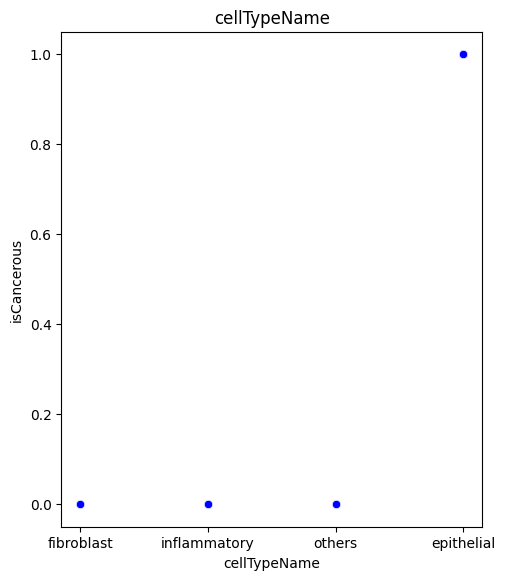

In [13]:
plt.figure(figsize=(25,45))
plt.subplot(6,4,1)
sns.scatterplot(data=dfMain, x=dfMain['cellTypeName'], y='isCancerous', color='blue')
plt.title('cellTypeName')
plt.xticks(rotation='horizontal')

<Axes: xlabel='Is Cancerous'>

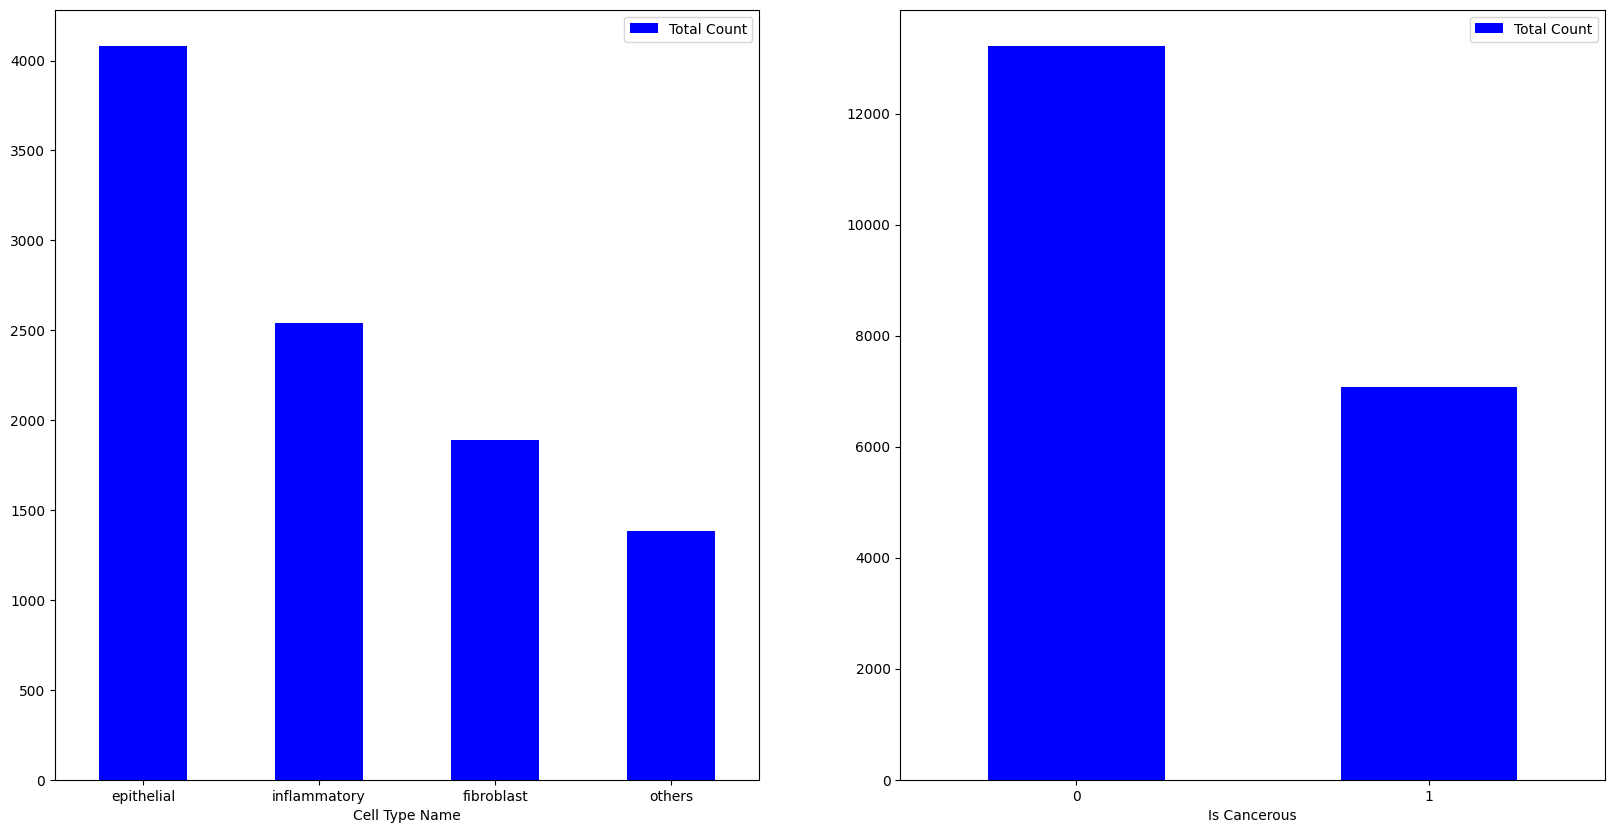

In [14]:
dfCellCounts = pd.DataFrame(dfMain.cellTypeName.value_counts().reset_index().values, columns=['Cell Type Name', 'Total Count'])
dfCancerousCounts = pd.DataFrame(dfJoined.isCancerous.value_counts().reset_index().values, columns=['Is Cancerous', 'Total Count'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
dfCellCounts.plot(kind='bar', x='Cell Type Name', y='Total Count', color='blue', ax=axes[0], rot=0)
dfCancerousCounts.plot(kind='bar', x='Is Cancerous', y='Total Count', color='blue', ax=axes[1], rot=0)

## Datasplit for Cell Type Classification

In [15]:
# DF For Cell Type Classification
dfPatientImagesCount_CT = pd.DataFrame(dfMain.patientID.value_counts().reset_index().values, columns=['Patient ID', 'Total Images for Patient'])
dfPatientImagesCount_CT = dfPatientImagesCount_CT.sort_values('Patient ID', ascending=True)
print("Average number of images per patient ID: ", dfPatientImagesCount_CT['Total Images for Patient'].mean().round())

Average number of images per patient ID:  165.0


In [16]:
moreThan300 = []
lessThan100 = []
theRest = []

print("DF LENGTH: ", len(dfPatientImagesCount_CT))

for index, patient in dfPatientImagesCount_CT.iterrows():
    imageCount = patient['Total Images for Patient'].astype('int')
    if imageCount > 300: 
        moreThan300.append(patient['Patient ID'])
    elif imageCount < 100:
        lessThan100.append(patient['Patient ID'])
    else:
        theRest.append(patient['Patient ID'])

print(moreThan300)
print(lessThan100)
print(theRest)

total = len(moreThan300) + len(lessThan100) + len(theRest)
print("Total: ", total)

DF LENGTH:  60
[8, 9, 10, 17, 18, 20, 29, 54]
[1, 2, 11, 27, 28, 32, 34, 35, 37, 38, 45, 56]
[3, 4, 5, 6, 7, 12, 13, 14, 15, 16, 19, 21, 22, 23, 24, 25, 26, 30, 31, 33, 36, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 57, 58, 59, 60]
Total:  60


In [17]:
def customSplitter(list, train):
    random.shuffle(list)
    splitIndex = math.ceil(len(list) * train) 
    training = list[:splitIndex]
    testing = list[splitIndex:]
    return training, testing

In [18]:
splits1 = customSplitter(moreThan300, 0.8)
splits2 = customSplitter(lessThan100, 0.8)
splits3 = customSplitter(theRest, 0.8)

trainingPatientID_CT = splits1[0] + splits2[0] + splits3[0]
testingPatientID_CT = splits1[1] + splits2[1] + splits3[1]
print(trainingPatientID_CT)
print(testingPatientID_CT)

[10, 8, 18, 54, 20, 9, 17, 34, 35, 2, 32, 37, 28, 45, 11, 1, 38, 49, 59, 3, 36, 19, 14, 48, 55, 44, 41, 16, 47, 50, 33, 4, 13, 51, 46, 21, 24, 52, 30, 42, 22, 31, 53, 26, 5, 39, 6, 40, 43]
[29, 56, 27, 60, 12, 25, 23, 57, 7, 58, 15]


/var/folders/7m/ppn2g1x93gg4s4v7r9s9qz140000gn/T/ipykernel_57964/1549123549.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set_CT['Colour'] = 'blue'
/var/folders/7m/ppn2g1x93gg4s4v7r9s9qz140000gn/T/ipykernel_57964/1549123549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_set_CT['Colour'] = 'red'


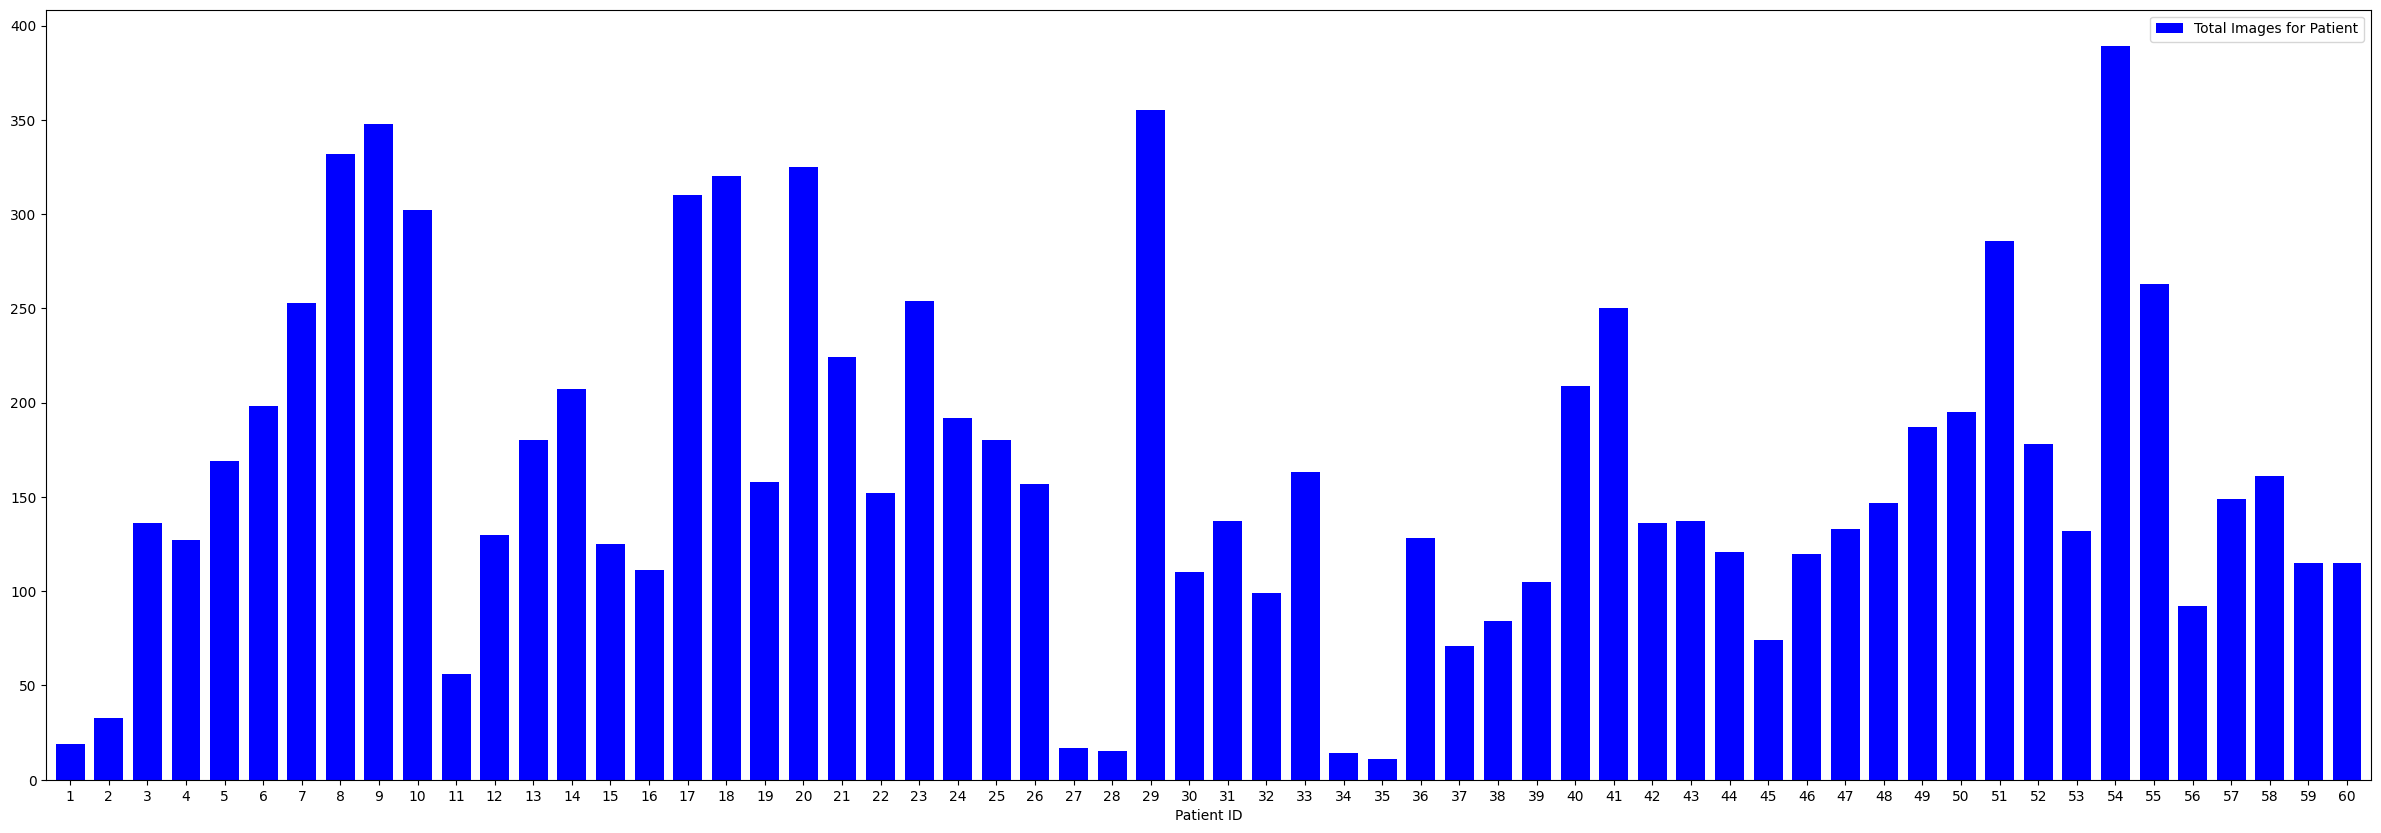

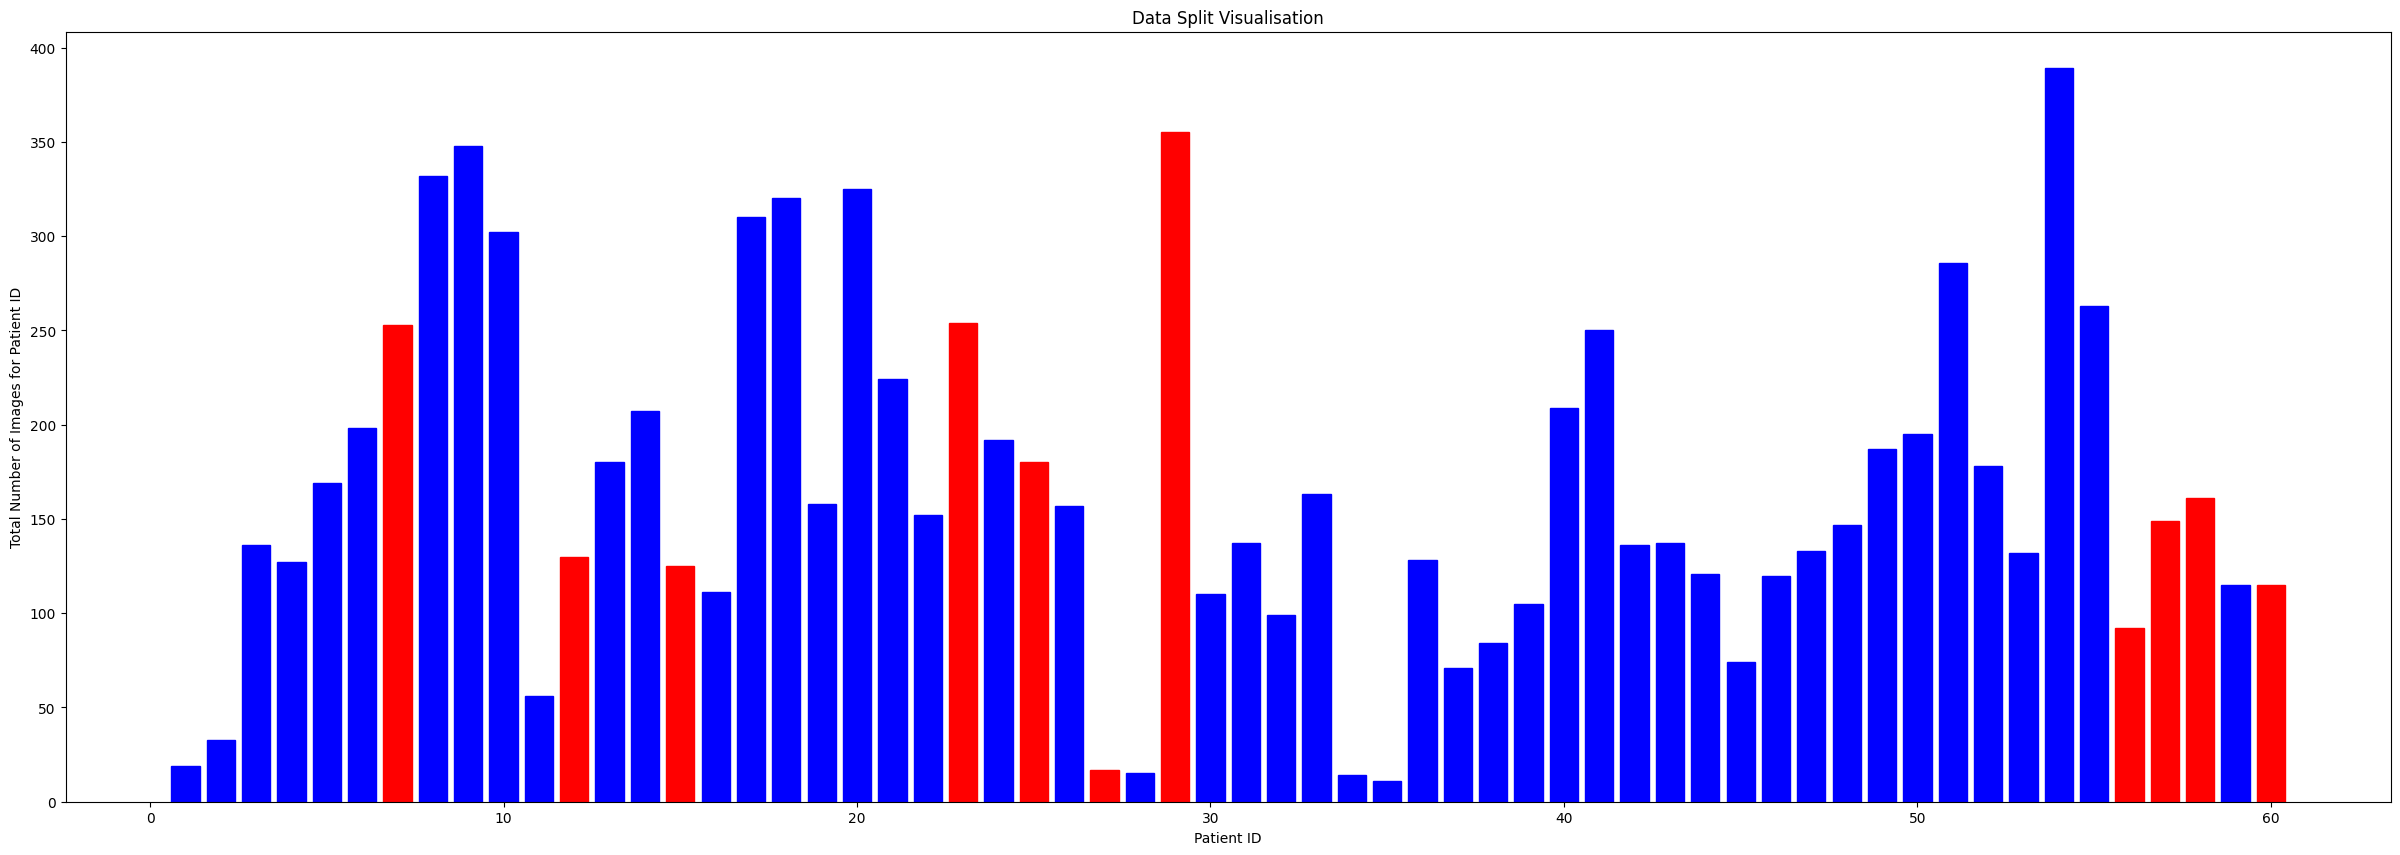

Training Data = BLUE
Average number of Training:  165.0

Testing Data = RED
Average number of Testing:  166.0


In [19]:
training_set_CT = dfPatientImagesCount_CT[dfPatientImagesCount_CT['Patient ID'].isin(trainingPatientID_CT)]
testing_set_CT = dfPatientImagesCount_CT[dfPatientImagesCount_CT['Patient ID'].isin(testingPatientID_CT)] 

training_set_CT['Colour'] = 'blue'
testing_set_CT['Colour'] = 'red'
dfSplitData = pd.concat([training_set_CT, testing_set_CT])
dfSplitData.sort_values(['Patient ID'], ascending=True, inplace=True)

dfPatientImagesCount_CT.plot(kind='bar', x='Patient ID', y='Total Images for Patient', color='blue', figsize=(30, 10), rot=0, width=0.75)

fig, ax = plt.subplots(figsize=(30, 10))
bars = ax.bar(dfSplitData['Patient ID'], dfSplitData['Total Images for Patient'])

for i, bar in enumerate(bars):
    bar.set_color(dfSplitData.iloc[i]['Colour'])

ax.set_xlabel('Patient ID')
ax.set_ylabel('Total Number of Images for Patient ID')
ax.set_title('Data Split Visualisation')

plt.show()

print("Training Data = BLUE")
print("Average number of Training: ", training_set_CT['Total Images for Patient'].mean().round())
print()
print("Testing Data = RED")
print("Average number of Testing: ", testing_set_CT['Total Images for Patient'].mean().round())

## Datasplit for Cancerous Classification

In [123]:
# DF For Cell Type Classification
dfPatientImagesCount_IC = pd.DataFrame(dfJoined.patientID.value_counts().reset_index().values, columns=['Patient ID', 'Total Images for Patient'])
dfPatientImagesCount_IC = dfPatientImagesCount_IC.sort_values('Patient ID', ascending=True)
print("Average number of images per patient ID: ", dfPatientImagesCount_IC['Total Images for Patient'].mean().round())

Average number of images per patient ID:  207.0


In [143]:
moreThan350 = []
lessThan100 = []
theRest = []

print("DF LENGTH: ", len(dfPatientImagesCount_IC))

for index, patient in dfPatientImagesCount_IC.iterrows():
    imageCount = patient['Total Images for Patient'].astype('int')
    if imageCount > 350: 
        moreThan350.append(patient['Patient ID'])
    elif imageCount < 100:
        lessThan100.append(patient['Patient ID'])
    else:
        theRest.append(patient['Patient ID'])

print(moreThan350)
print(lessThan100)
print(theRest)

total = len(moreThan350) + len(lessThan100) + len(theRest)
print("Total: ", total)

DF LENGTH:  98
[29, 54, 66, 67, 68, 77, 78, 79, 80, 81, 85, 86, 88, 89, 90, 91, 92]
[1, 2, 11, 27, 28, 32, 34, 35, 37, 38, 45, 56, 62, 63, 64, 72, 73, 74, 75, 93, 94, 95, 96, 98, 99]
[3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 30, 31, 33, 36, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 55, 57, 58, 59, 60, 61, 65, 69, 70, 71, 82, 83, 84, 87, 97]
Total:  98


In [144]:
splits1 = customSplitter(moreThan350, 0.8)
splits2 = customSplitter(lessThan100, 0.8)
splits3 = customSplitter(theRest, 0.8)

trainingPatientID_IC = splits1[0] + splits2[0] + splits3[0]
testingPatientID_IC = splits1[1] + splits2[1] + splits3[1]
print(trainingPatientID_IC)
print(testingPatientID_IC)

[91, 78, 77, 88, 86, 92, 29, 90, 80, 89, 85, 79, 54, 66, 62, 27, 45, 28, 1, 63, 64, 95, 32, 94, 73, 98, 96, 99, 37, 35, 74, 11, 38, 75, 21, 5, 59, 83, 87, 25, 97, 58, 16, 71, 61, 57, 22, 39, 82, 14, 42, 46, 36, 60, 17, 65, 23, 49, 15, 10, 7, 20, 19, 48, 47, 33, 40, 26, 31, 8, 70, 12, 30, 55, 4, 69, 43, 18, 6]
[68, 67, 81, 34, 2, 56, 72, 93, 51, 44, 41, 50, 52, 84, 9, 3, 24, 53, 13]


/var/folders/7m/ppn2g1x93gg4s4v7r9s9qz140000gn/T/ipykernel_57964/436633843.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set_IC['Colour'] = 'blue'
/var/folders/7m/ppn2g1x93gg4s4v7r9s9qz140000gn/T/ipykernel_57964/436633843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_set_IC['Colour'] = 'red'


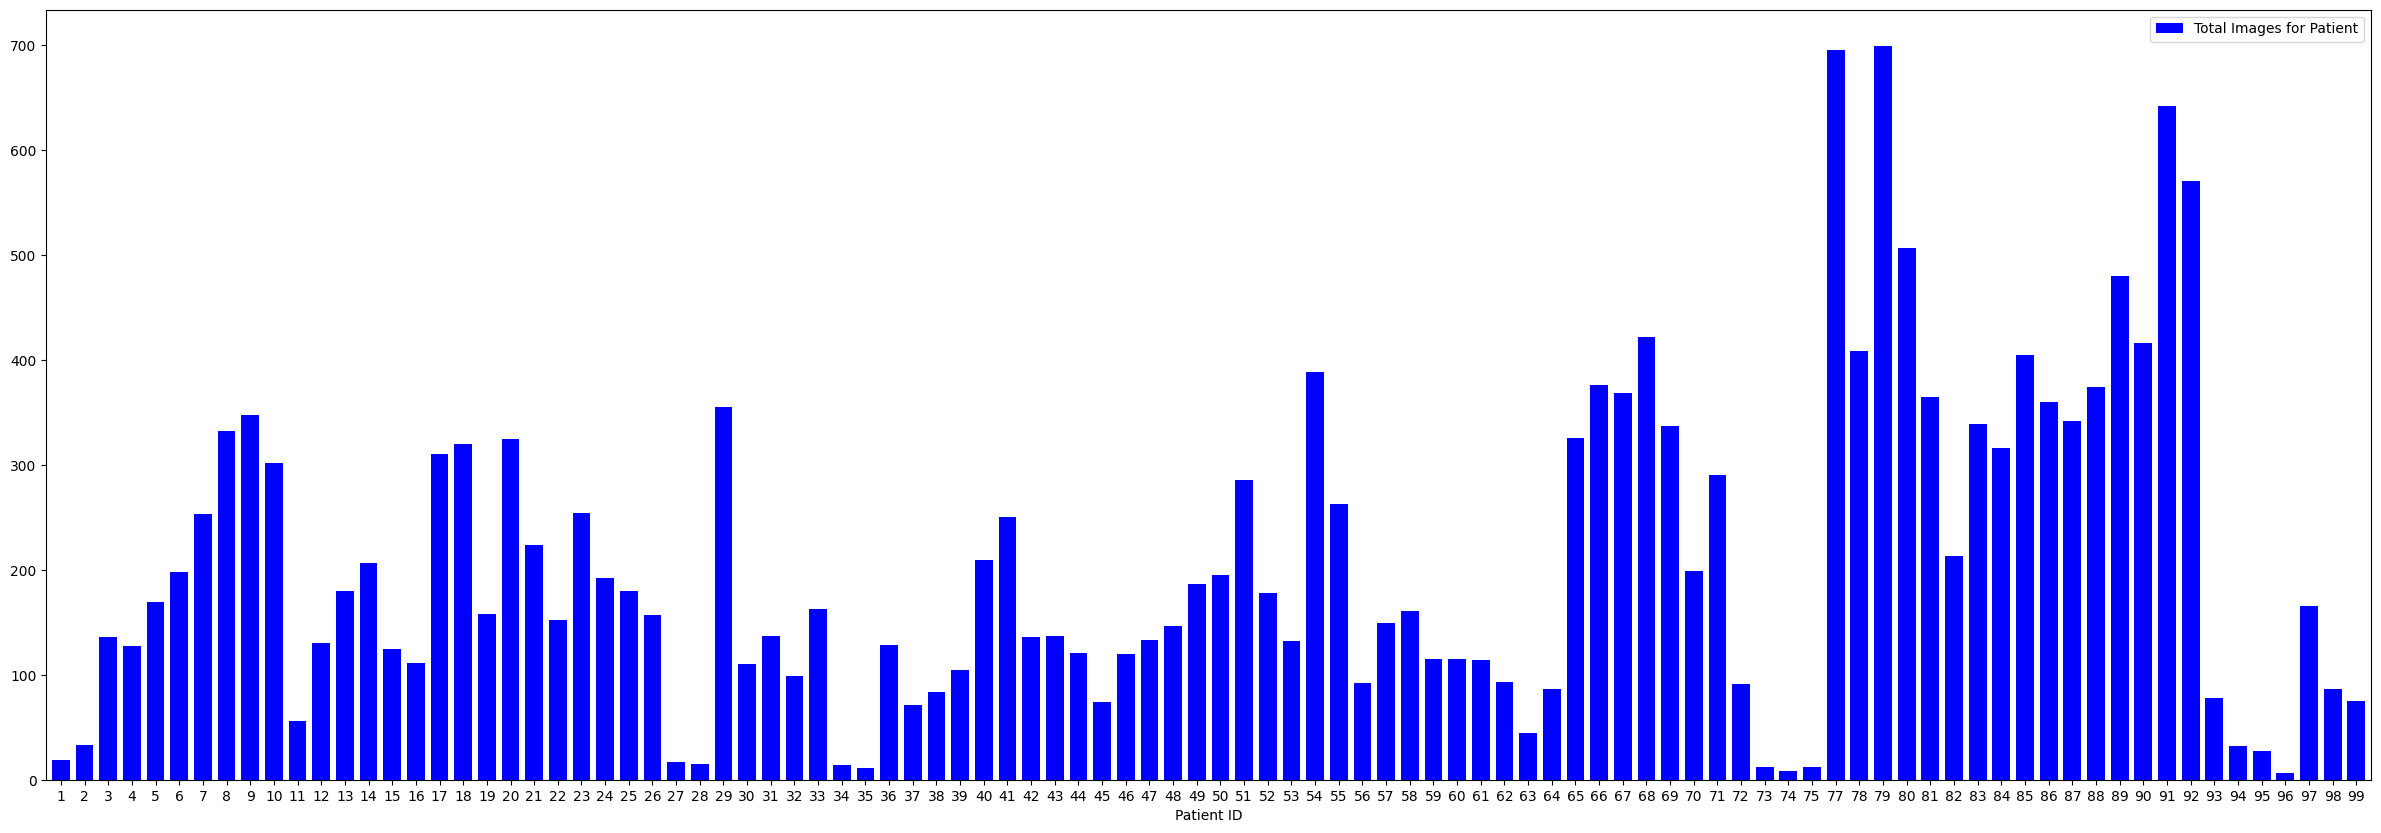

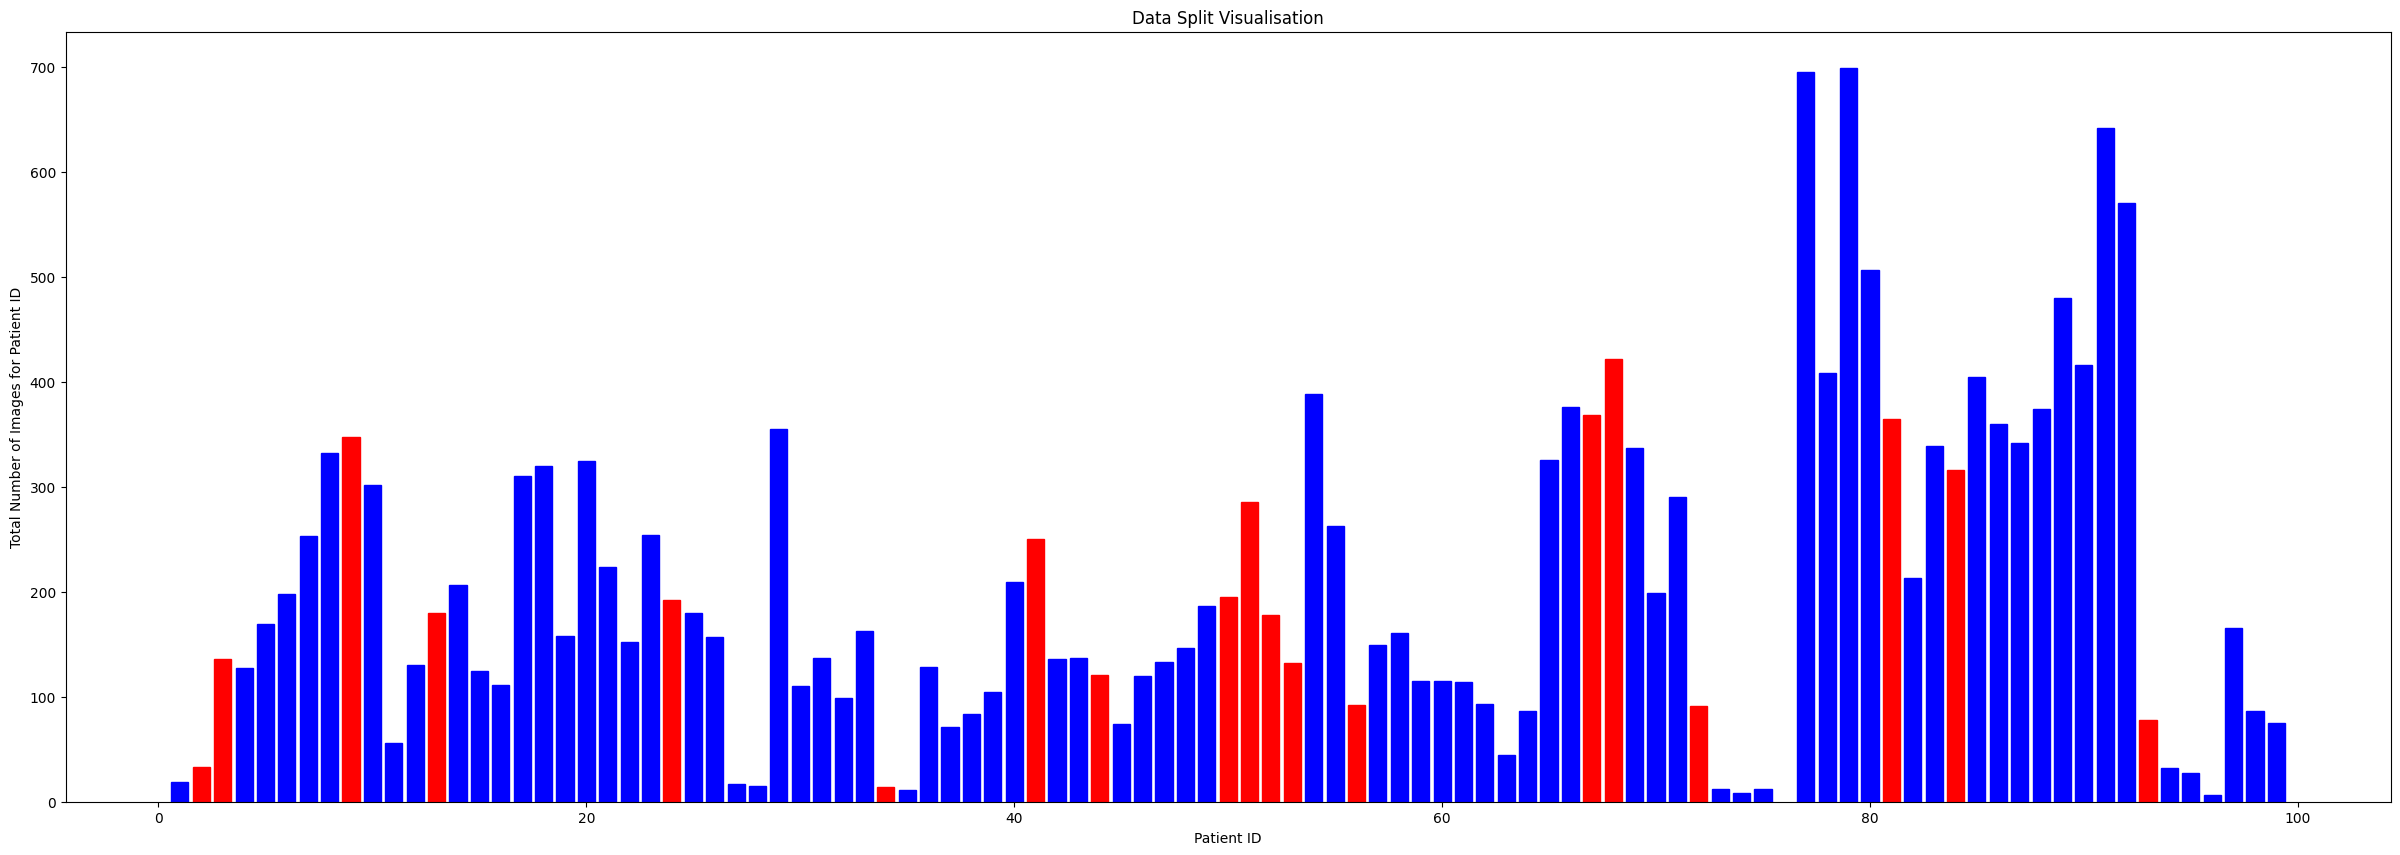

Training Data = BLUE
Average number of Training:  209.0

Testing Data = RED
Average number of Testing:  200.0


In [145]:
training_set_IC = dfPatientImagesCount_IC[dfPatientImagesCount_IC['Patient ID'].isin(trainingPatientID_IC)]
testing_set_IC = dfPatientImagesCount_IC[dfPatientImagesCount_IC['Patient ID'].isin(testingPatientID_IC)] 

training_set_IC['Colour'] = 'blue'
testing_set_IC['Colour'] = 'red'
dfSplitData = pd.concat([training_set_IC, testing_set_IC])
dfSplitData.sort_values(['Patient ID'], ascending=True, inplace=True)

dfPatientImagesCount_IC.plot(kind='bar', x='Patient ID', y='Total Images for Patient', color='blue', figsize=(30, 10), rot=0, width=0.75)

fig, ax = plt.subplots(figsize=(30, 10))
bars = ax.bar(dfSplitData['Patient ID'], dfSplitData['Total Images for Patient'])

for i, bar in enumerate(bars):
    bar.set_color(dfSplitData.iloc[i]['Colour'])

ax.set_xlabel('Patient ID')
ax.set_ylabel('Total Number of Images for Patient ID')
ax.set_title('Data Split Visualisation')

plt.show()

print("Training Data = BLUE")
print("Average number of Training: ", training_set_IC['Total Images for Patient'].mean().round())
print()
print("Testing Data = RED")
print("Average number of Testing: ", testing_set_IC['Total Images for Patient'].mean().round())

# Data for Cell Type Classification

In [146]:
# _CT == Cell Type Classification
trainingSetCellType = dfMain[dfMain['patientID'].isin(training_set_CT['Patient ID'])]
testingSetCellType = dfMain[dfMain['patientID'].isin(testing_set_CT['Patient ID'])]

print(trainingSetCellType)
print()
print(testingSetCellType)

      InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0          22405          1  22405.png   fibroblast         0            0
1          22406          1  22406.png   fibroblast         0            0
2          22407          1  22407.png   fibroblast         0            0
3          22408          1  22408.png   fibroblast         0            0
4          22409          1  22409.png   fibroblast         0            0
...          ...        ...        ...          ...       ...          ...
9776       17819         59  17819.png       others         3            0
9777       17820         59  17820.png       others         3            0
9778       17821         59  17821.png       others         3            0
9779       17822         59  17822.png       others         3            0
9780       17823         59  17823.png       others         3            0

[8065 rows x 6 columns]

      InstanceID  patientID ImageName cellTypeName  cellType  isCancerous


# Data for Cancerous Classification

In [148]:
# _IC == Is Cancerous? Classification
trainingSetCancerous = dfJoined[dfJoined['patientID'].isin(training_set_IC['Patient ID'])]
testingSetCancerous = dfJoined[dfJoined['patientID'].isin(testing_set_IC['Patient ID'])]

print(trainingSetCancerous)
print()
print(testingSetCancerous)

       InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0           22405          1  22405.png   fibroblast       0.0            0
1           22406          1  22406.png   fibroblast       0.0            0
2           22407          1  22407.png   fibroblast       0.0            0
3           22408          1  22408.png   fibroblast       0.0            0
4           22409          1  22409.png   fibroblast       0.0            0
...           ...        ...        ...          ...       ...          ...
10379       20028         99  20028.png          NaN       NaN            0
10380       20029         99  20029.png          NaN       NaN            0
10381       20030         99  20030.png          NaN       NaN            0
10382       20031         99  20031.png          NaN       NaN            0
10383       20032         99  20032.png          NaN       NaN            0

[16482 rows x 6 columns]

      InstanceID  patientID  ImageName cellTypeName  cellType

In [128]:
dfEpithelial = dfMain.loc[dfMain['cellTypeName'] == 'epithelial']
dfInflammatory = dfMain.loc[dfMain['cellTypeName'] == 'inflammatory']
dfFibroblast = dfMain.loc[dfMain['cellTypeName'] == 'fibroblast']
dfOthers= dfMain.loc[dfMain['cellTypeName'] == 'others']

In [129]:
cancerous = dfMain.loc[dfMain['isCancerous'] == 1]
non_cancerous = dfMain.loc[dfMain['isCancerous'] == 0]
print(cancerous.equals(dfEpithelial))

True


In [44]:
path = 'Image_classification_data/patch_images/' # image folder

In [45]:
dfIsCancerous = dfJoined.loc[dfJoined['isCancerous'] == 1]
print(dfIsCancerous)

      InstanceID  patientID ImageName cellTypeName  cellType  isCancerous
449          276          5   276.png   epithelial       2.0            1
450          277          5   277.png   epithelial       2.0            1
451          278          5   278.png   epithelial       2.0            1
452          279          5   279.png   epithelial       2.0            1
453          280          5   280.png   epithelial       2.0            1
...          ...        ...       ...          ...       ...          ...
7800        7667         88  7667.png          NaN       NaN            1
7801        7668         88  7668.png          NaN       NaN            1
7802        7669         88  7669.png          NaN       NaN            1
7803        7670         88  7670.png          NaN       NaN            1
7804        7671         88  7671.png          NaN       NaN            1

[7069 rows x 6 columns]


In [46]:
dfNotCancerous = dfJoined.loc[dfJoined['isCancerous'] == 0]
print(dfNotCancerous)

       InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0           22405          1  22405.png   fibroblast       0.0            0
1           22406          1  22406.png   fibroblast       0.0            0
2           22407          1  22407.png   fibroblast       0.0            0
3           22408          1  22408.png   fibroblast       0.0            0
4           22409          1  22409.png   fibroblast       0.0            0
...           ...        ...        ...          ...       ...          ...
10379       20028         99  20028.png          NaN       NaN            0
10380       20029         99  20029.png          NaN       NaN            0
10381       20030         99  20030.png          NaN       NaN            0
10382       20031         99  20031.png          NaN       NaN            0
10383       20032         99  20032.png          NaN       NaN            0

[13211 rows x 6 columns]


In [47]:
nonCancerous = dfNotCancerous['ImageName'].tolist()
isCancerous = dfIsCancerous['ImageName'].tolist()

In [48]:
# randomly select 10 of each image from non-cancerous and cancerous lists
select_nonCancerous = np.random.choice(nonCancerous, 10, replace = False)
select_isCancerous = np.random.choice(isCancerous, 10, replace = False)

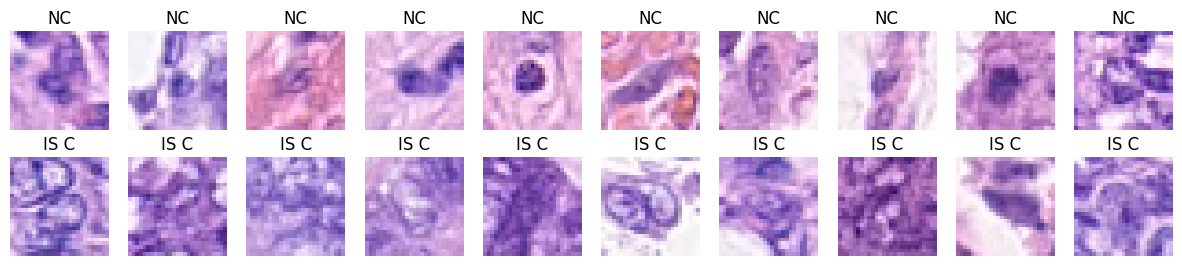

In [49]:
fig = plt.figure(figsize = (15,3))
rows = 2
columns = 12

for i in range(20):
    if i < 10:
        fp = path + select_nonCancerous[i]
        label = 'NC'
    else:
        fp = path + select_isCancerous[i-10]
        label = 'IS C'
        
    ax = fig.add_subplot(2, 10, i+1)
    fn = image.load_img(fp)
    plt.imshow(fn)
    plt.title(label)
    plt.axis('off')
plt.show()

In [50]:
epithelial = dfEpithelial['ImageName'].tolist()
inflammatory = dfInflammatory['ImageName'].tolist()
fibroblast = dfFibroblast['ImageName'].tolist()
others= dfOthers['ImageName'].tolist()

# # randomly select 10 of each image from each cell type name
selectEpithelial = np.random.choice(epithelial, 10, replace = False)
selectInflammatory = np.random.choice(inflammatory, 10, replace = False)
selectFibroblast = np.random.choice(fibroblast, 10, replace = False)
selectOthers = np.random.choice(others, 10, replace = False)

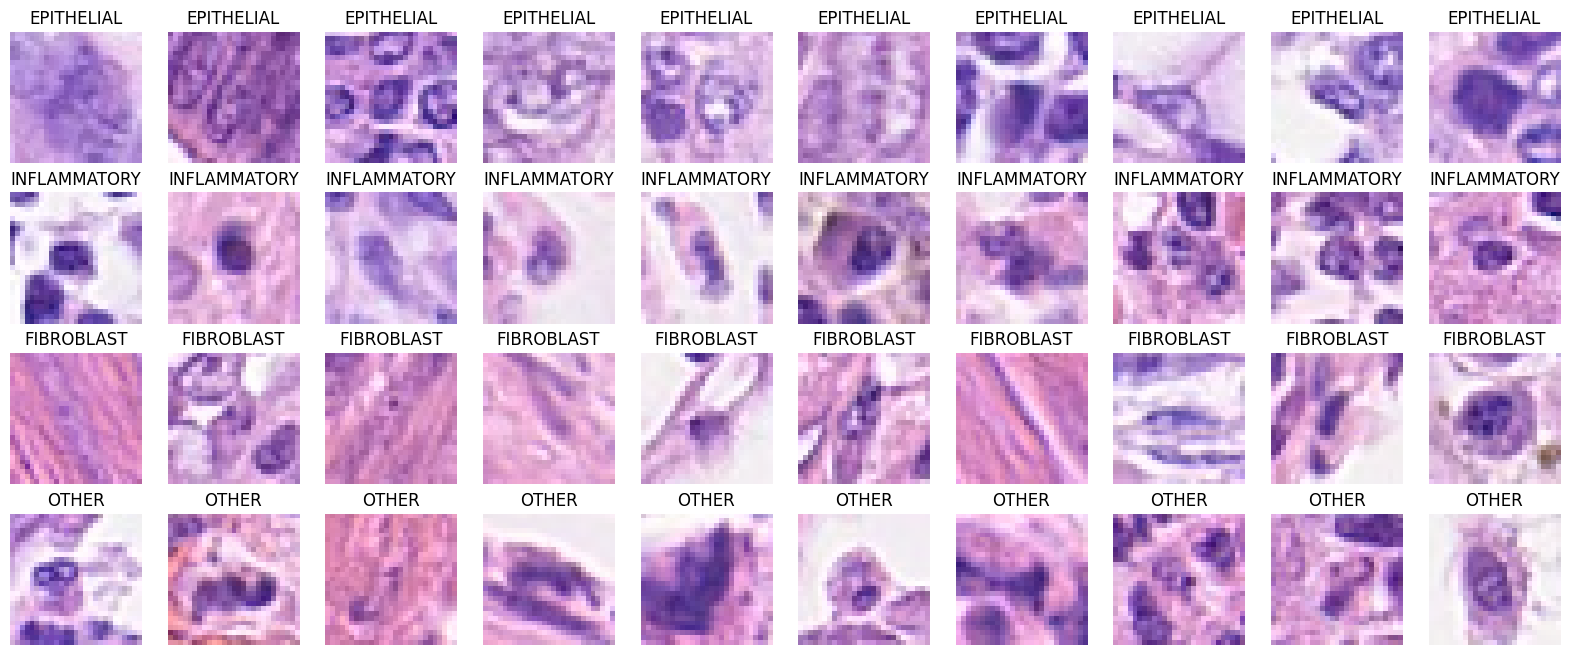

In [51]:
fig = plt.figure(figsize = (20,8))
rows = 4
columns = 12

for i in range(40):
    if i < 10:
        fp = path + selectEpithelial[i]
        label = 'EPITHELIAL'
    elif i < 20 :
        fp = path + selectInflammatory[i-10]
        label = 'INFLAMMATORY'
    elif i < 30 :
        fp = path + selectFibroblast[i-20]
        label = 'FIBROBLAST'
    elif i < 40 :
        fp = path + selectOthers[i-30]
        label = 'OTHER'
        
    ax = fig.add_subplot(4, 10, i+1)
    fn = image.load_img(fp)
    plt.imshow(fn)
    plt.title(label)
    plt.axis('off')
plt.show()

In [52]:
def readImagesFromList(imgList, mode):
    images = []
    for filename in imgList:      
        img = cv2.imread(path + filename)
        if img is not None and mode == 'gray':
            img_flat = img.flatten()
            images.append(img_flat)
        elif img is not None:
            images.append(img)
    return images

ncImagesGS = readImagesFromList(nonCancerous, 'gray')
icImagesGS = readImagesFromList(isCancerous, 'gray')
ncImagesRGB = readImagesFromList(nonCancerous, None)
icImagesRGB = readImagesFromList(isCancerous, None)

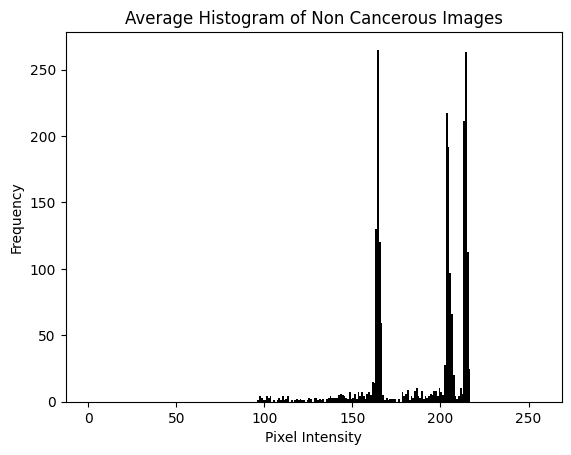

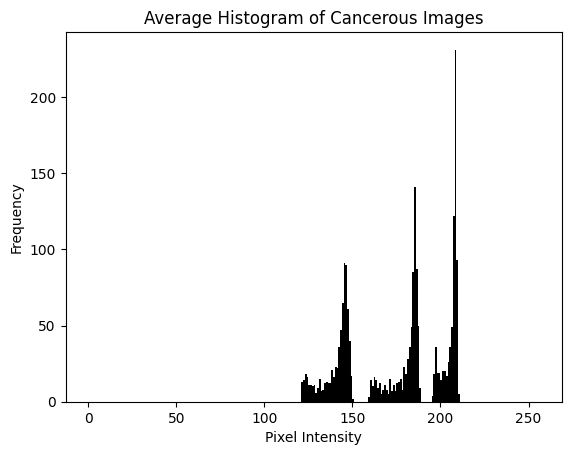

In [53]:
def imageHistograms(images, title):
#     images = read_images_from_list(imgList)
    pixel_values = np.array(images).mean(axis=0)
    plt.hist(pixel_values, bins=256, range=(0, 256), color='k')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

imageHistograms(ncImagesGS, 'Average Histogram of Non Cancerous Images')
imageHistograms(icImagesGS, 'Average Histogram of Cancerous Images')

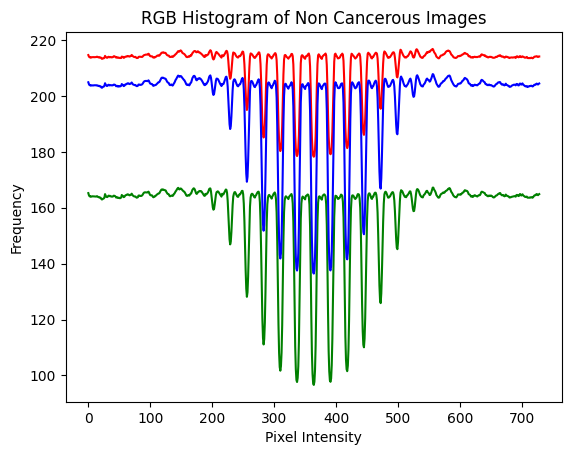

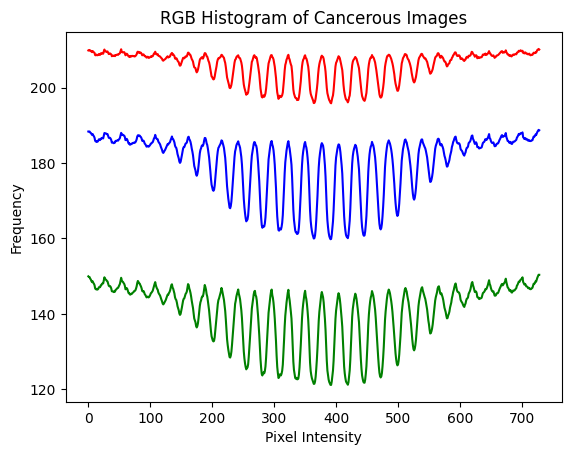

In [54]:
def colouredHistograms(images, title):
    red_values = []
    green_values = []
    blue_values = []

    for img in images:
        red_values.append(img[:,:,0].flatten())
        green_values.append(img[:,:,1].flatten())
        blue_values.append(img[:,:,2].flatten())

    red_values = np.array(red_values).mean(axis=0)
    green_values = np.array(green_values).mean(axis=0)
    blue_values = np.array(blue_values).mean(axis=0)

    plt.plot(red_values, color='r')
    plt.plot(green_values, color='g')
    plt.plot(blue_values, color='b')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

colouredHistograms(ncImagesRGB, 'RGB Histogram of Non Cancerous Images')
colouredHistograms(icImagesRGB, 'RGB Histogram of Cancerous Images')

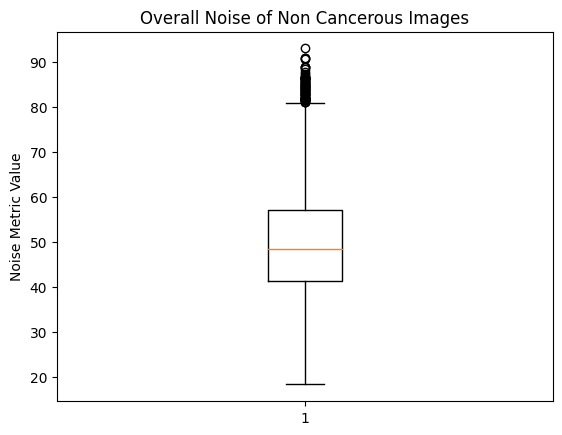

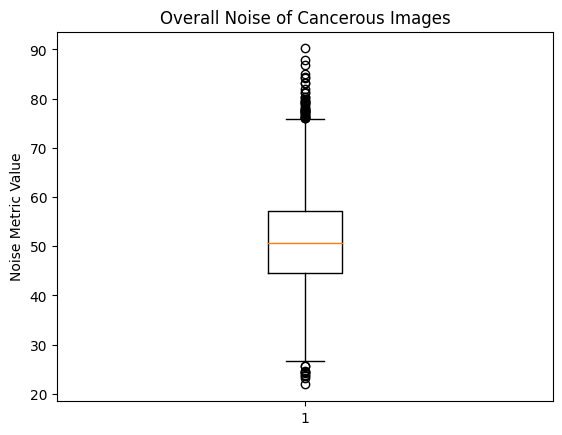

In [55]:
def calculateNoise(image, title):
    overall_noise = []    
    for img in image:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        laplacian = cv2.Laplacian(gray, cv2.CV_64F)
        noise = laplacian.std()
        overall_noise.append(noise)
    
    plt.boxplot(overall_noise)
    plt.title(title)
    plt.ylabel("Noise Metric Value")
    plt.show()

calculateNoise(ncImagesRGB, 'Overall Noise of Non Cancerous Images')
calculateNoise(icImagesRGB, 'Overall Noise of Cancerous Images')

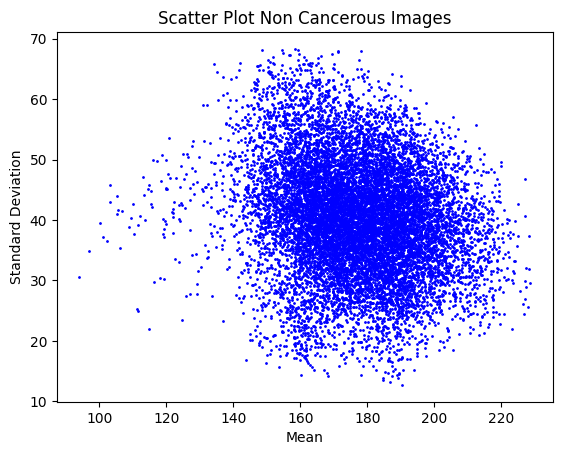

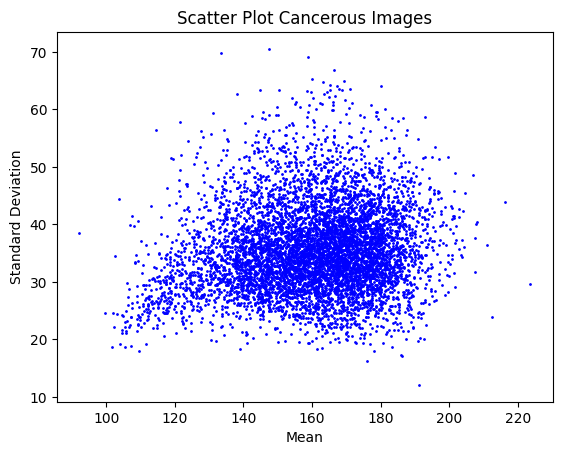

In [56]:
def extractFeatures(image, title):
    x_values = []
    y_values = []
    
    for img in image: 
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mean = gray.mean()
        std = gray.std()
        x_values.append(mean)
        y_values.append(std)

    plt.scatter(x_values, y_values, s=1, color='blue')
    plt.title(title)
    plt.xlabel("Mean")
    plt.ylabel("Standard Deviation")
    plt.show()
    
extractFeatures(ncImagesRGB, 'Scatter Plot Non Cancerous Images')
extractFeatures(icImagesRGB, 'Scatter Plot Cancerous Images')

# Baseline Neural Network - Cell Type Classification

In [ ]:
# from sklearn.model_selection import train_test_split

# with pd.option_context('mode.chained_assignment', None):
#     train_data_, test_data = train_test_split(dfMain, test_size=0.2, 
#                                               shuffle=True,random_state=0)
    
# with pd.option_context('mode.chained_assignment', None):
#     train_data, val_data = train_test_split(train_data_, test_size=0.25, 
#                                             shuffle=True,random_state=0)
    
# print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

In [91]:
from sklearn.model_selection import train_test_split
# trainingSetCellType
# testingSetCellType

with pd.option_context('mode.chained_assignment', None):
    trainingSetCellType, validationSetCellType = train_test_split(trainingSetCellType, test_size=0.25, 
                                            shuffle=True,random_state=0)

print("Train data : {}, Val Data: {}, Test Data: {}".format(trainingSetCellType.shape[0], validationSetCellType.shape[0], testingSetCellType.shape[0]))

# trainingSetCellType.rename(columns={"cellType": "Class"}, inplace=True)
# validationSetCellType.rename(columns={"cellType": "Class"}, inplace=True)
# testingSetCellType.rename(columns={"cellType": "Class"}, inplace=True)

# train_X = trainingSetCellType.drop(['isCancerous',], axis=1).to_numpy()
# train_y = trainingSetCellType[['isCancerous']].to_numpy()

# test_X = testingSetCellType.drop(['isCancerous',], axis=1).to_numpy()
# test_y = testingSetCellType[['isCancerous']].to_numpy()

# val_X = validationSetCellType.drop(['isCancerous',], axis=1).to_numpy()
# val_y = validationSetCellType[['isCancerous']].to_numpy()

Train data : 6048, Val Data: 2017, Test Data: 1831


In [92]:
print(trainingSetCellType)

      InstanceID  patientID  ImageName  cellTypeName  cellType  isCancerous
2798        8721         17   8721.png    epithelial         2            1
3608         416         20    416.png        others         3            0
3890        9307         21   9307.png    epithelial         2            1
535         4139          6   4139.png  inflammatory         1            0
8769       13851         54  13851.png        others         3            0
...          ...        ...        ...           ...       ...          ...
6245       16492         39  16492.png    fibroblast         0            0
3772         598         20    598.png    epithelial         2            1
1906       13659         10  13659.png    epithelial         2            1
3115        8383         18   8383.png    epithelial         2            1
3240        8516         18   8516.png    epithelial         2            1

[6048 rows x 6 columns]


In [93]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [110]:
# 27x27 pixels in an image and 3 layers due to coloured RGB Image
# Hidden Layer 256 due to 0-255 value of pixel count
# Output classes = 4 due to 4 different possibilities of classification
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 4

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2187)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               560128    
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 561,156
Trainable params: 561,156
Non-trainable params: 0
_________________________________________________________________


In [95]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=INPUT_DIM),
#     tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
#     tf.keras.layers.Dense(OUTPUT_CLASSES)
# ])

In [96]:
# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2187)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               560128    
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 561,156
Trainable params: 561,156
Non-trainable params: 0
_________________________________________________________________


In [68]:
# FIX THIS LATER #
# tf.keras.utils.plot_model(model, show_shapes=True)

In [97]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [98]:
# cellType == Class in this case
trainingSetCellType['cellType'] = trainingSetCellType['cellType'].astype('str')
validationSetCellType['cellType'] = validationSetCellType['cellType'].astype('str')

In [106]:
print(trainingSetCellType)
print(validationSetCellType)

      InstanceID  patientID  ImageName  cellTypeName cellType  isCancerous
2798        8721         17   8721.png    epithelial        2            1
3608         416         20    416.png        others        3            0
3890        9307         21   9307.png    epithelial        2            1
535         4139          6   4139.png  inflammatory        1            0
8769       13851         54  13851.png        others        3            0
...          ...        ...        ...           ...      ...          ...
6245       16492         39  16492.png    fibroblast        0            0
3772         598         20    598.png    epithelial        2            1
1906       13659         10  13659.png    epithelial        2            1
3115        8383         18   8383.png    epithelial        2            1
3240        8516         18   8516.png    epithelial        2            1

[6048 rows x 6 columns]
      InstanceID  patientID  ImageName  cellTypeName cellType  isCancerous


In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 27

train_generator = train_datagen.flow_from_dataframe(
        dataframe=trainingSetCellType,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=validationSetCellType,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 6048 validated image filenames belonging to 4 classes.
Found 2017 validated image filenames belonging to 4 classes.


In [108]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

/var/folders/7m/ppn2g1x93gg4s4v7r9s9qz140000gn/T/ipykernel_57964/2779164914.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)
2023-05-15 09:43:14.446407: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-15 09:43:16.152092: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


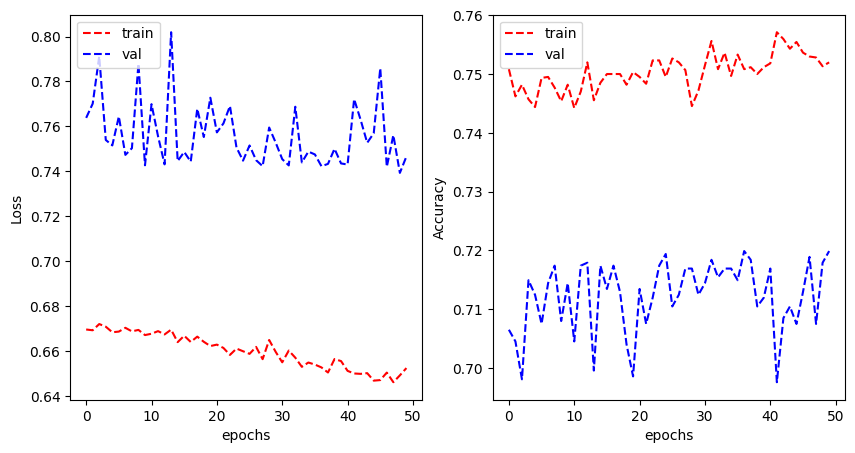

In [109]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

## Redefining the model with 1000 layers

In [111]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 1000
OUTPUT_CLASSES = 4

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 2187)              0         
                                                                 
 dense_6 (Dense)             (None, 1000)              2188000   
                                                                 
 dense_7 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 2,192,004
Trainable params: 2,192,004
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [113]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

/var/folders/7m/ppn2g1x93gg4s4v7r9s9qz140000gn/T/ipykernel_57964/2779164914.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)
2023-05-15 09:50:48.393866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-15 09:50:53.366226: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


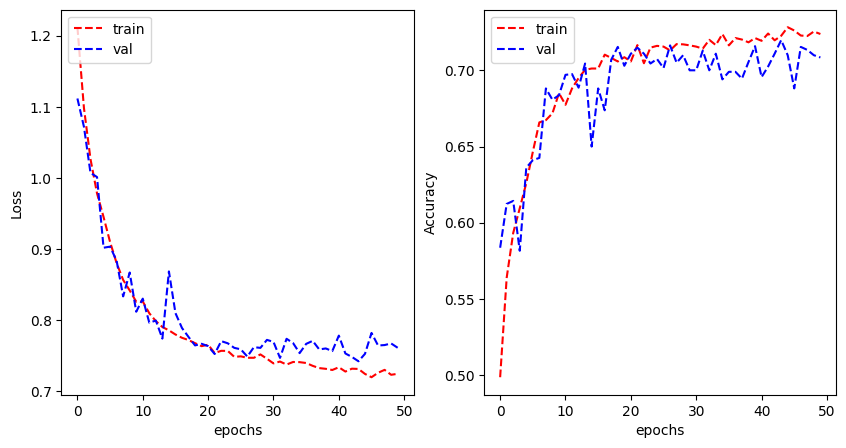

In [114]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

## Testing the Model

In [116]:
testingSetCellType['cellType'] = testingSetCellType['cellType'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=testingSetCellType,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

print(testingSetCellType)

Found 1831 validated image filenames belonging to 4 classes.
      InstanceID  patientID ImageName cellTypeName cellType  isCancerous
682         8981          7  8981.png   fibroblast        0            0
683         8982          7  8982.png   fibroblast        0            0
684         8983          7  8983.png   fibroblast        0            0
685         8984          7  8984.png   fibroblast        0            0
686         8985          7  8985.png   fibroblast        0            0
...          ...        ...       ...          ...      ...          ...
9891        1625         60  1625.png   epithelial        2            1
9892        1626         60  1626.png   epithelial        2            1
9893        1627         60  1627.png   epithelial        2            1
9894        1628         60  1628.png   epithelial        2            1
9895        1629         60  1629.png   epithelial        2            1

[1831 rows x 6 columns]


/var/folders/7m/ppn2g1x93gg4s4v7r9s9qz140000gn/T/ipykernel_57964/3309425605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testingSetCellType['cellType'] = testingSetCellType['cellType'].astype('str')


 119/1831 [>.............................] - ETA: 2s - loss: 1.2968 - categorical_accuracy: 0.4454  

2023-05-15 10:03:15.744056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1831/1831 [==============================] - 2s 1ms/step - loss: 1.1198 - categorical_accuracy: 0.4872


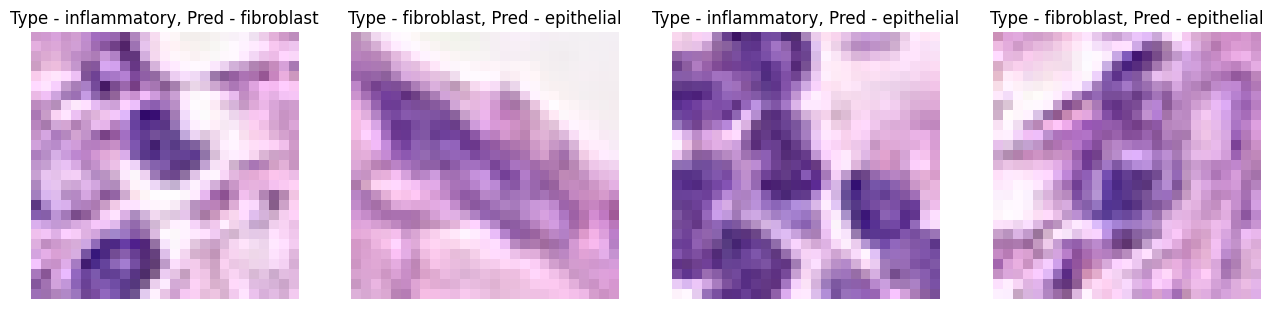

In [121]:
model.evaluate(test_generator)
label_names = {'fibroblast' : 0, 'inflammatory' : 1, 'epithelial' : 2, 'others' : 3}

d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(20,10))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("Type - {}, Pred - {}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [118]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

 107/1831 [>.............................] - ETA: 2s - loss: 1.1060 - categorical_accuracy: 0.4953 

2023-05-15 10:01:39.757072: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1831/1831 [==============================] - 2s 1ms/step - loss: 1.1198 - categorical_accuracy: 0.4872
Test Loss: 1.1198382377624512
Test Accuracy: 0.4871654808521271


# Baseline Neural Network - Cancerous Classification

In [150]:
# trainingSetCancerous
# testingSetCancerous

with pd.option_context('mode.chained_assignment', None):
    trainingSetCancerous, validationSetCancerous = train_test_split(trainingSetCancerous, test_size=0.25, 
                                            shuffle=True,random_state=0)

print("Train data : {}, Val Data: {}, Test Data: {}".format(trainingSetCancerous.shape[0], validationSetCancerous.shape[0], testingSetCancerous.shape[0]))

Train data : 12361, Val Data: 4121, Test Data: 3798


In [156]:
# train_X = trainingSetCellType.drop(['isCancerous',], axis=1).to_numpy()
# train_y = trainingSetCellType[['isCancerous']].to_numpy()

# test_X = test_data.drop(['isCancerous',], axis=1).to_numpy()
# test_y = test_data[['isCancerous']].to_numpy()

# val_X = val_data.drop(['isCancerous',], axis=1).to_numpy()
# val_y = val_data[['isCancerous']].to_numpy()

In [153]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 2187)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               560128    
                                                                 
 dense_11 (Dense)            (None, 2)                 514       
                                                                 
Total params: 560,642
Trainable params: 560,642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# FIX THIS LATER #
# tf.keras.utils.plot_model(model, show_shapes=True)

In [154]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [155]:
trainingSetCancerous['isCancerous'] = trainingSetCancerous['isCancerous'].astype('str')
validationSetCancerous['isCancerous'] = validationSetCancerous['isCancerous'].astype('str')

In [157]:
print(trainingSetCancerous)
print(validationSetCancerous)

      InstanceID  patientID  ImageName  cellTypeName  cellType isCancerous
3607        5164         78   5164.png           NaN       NaN           0
9057       19480         91  19480.png           NaN       NaN           0
5948       22168         83  22168.png           NaN       NaN           0
5744       19800         33  19800.png  inflammatory       1.0           0
3637        5197         78   5197.png           NaN       NaN           0
...          ...        ...        ...           ...       ...         ...
2277       10383         70  10383.png           NaN       NaN           1
6947        9740         86   9740.png           NaN       NaN           0
2988        1886         77   1886.png           NaN       NaN           0
3942       10535         79  10535.png           NaN       NaN           0
3429        1108         19   1108.png        others       3.0           0

[12361 rows x 6 columns]
      InstanceID  patientID  ImageName  cellTypeName  cellType isCancerous

In [159]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 27

train_generator = train_datagen.flow_from_dataframe(
        dataframe=trainingSetCancerous,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=validationSetCancerous,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')


Found 12361 validated image filenames belonging to 2 classes.
Found 4121 validated image filenames belonging to 2 classes.


In [160]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

/var/folders/7m/ppn2g1x93gg4s4v7r9s9qz140000gn/T/ipykernel_57964/2779164914.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)
2023-05-15 10:17:23.533315: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-15 10:17:31.310981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


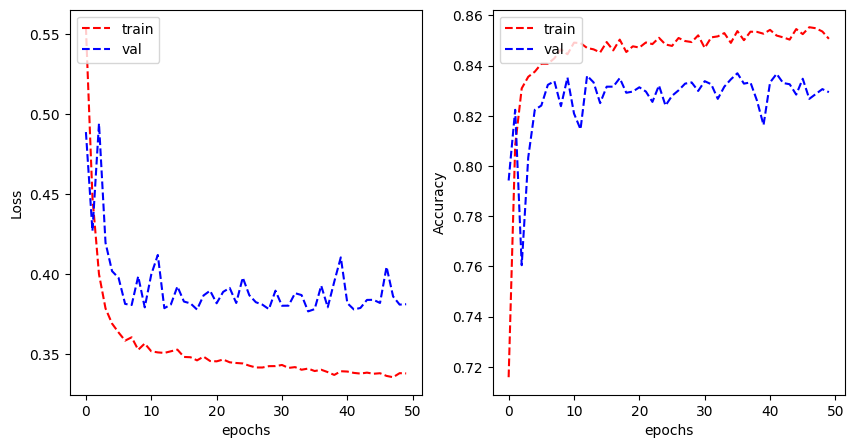

In [161]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

## Redefining the model

In [169]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 1000
OUTPUT_CLASSES = 2

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 2187)              0         
                                                                 
 dense_16 (Dense)            (None, 1000)              2188000   
                                                                 
 dense_17 (Dense)            (None, 2)                 2002      
                                                                 
Total params: 2,190,002
Trainable params: 2,190,002
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [171]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

/var/folders/7m/ppn2g1x93gg4s4v7r9s9qz140000gn/T/ipykernel_57964/2779164914.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)
2023-05-15 10:29:54.283485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-15 10:30:00.375937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


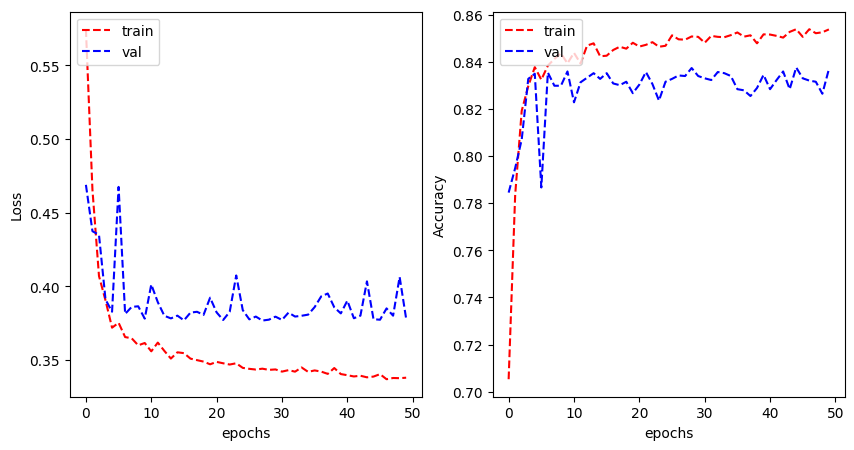

In [172]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

## Testing the Model

In [175]:
testingSetCancerous['isCancerous'] = testingSetCancerous['isCancerous'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=testingSetCancerous,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 3798 validated image filenames belonging to 2 classes.


/var/folders/7m/ppn2g1x93gg4s4v7r9s9qz140000gn/T/ipykernel_57964/125250808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testingSetCancerous['isCancerous'] = testingSetCancerous['isCancerous'].astype('str')


 121/3798 [..............................] - ETA: 4s - loss: 0.3439 - categorical_accuracy: 0.8264

2023-05-15 10:40:51.573172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3798/3798 [==============================] - 4s 1ms/step - loss: 0.3257 - categorical_accuracy: 0.8586


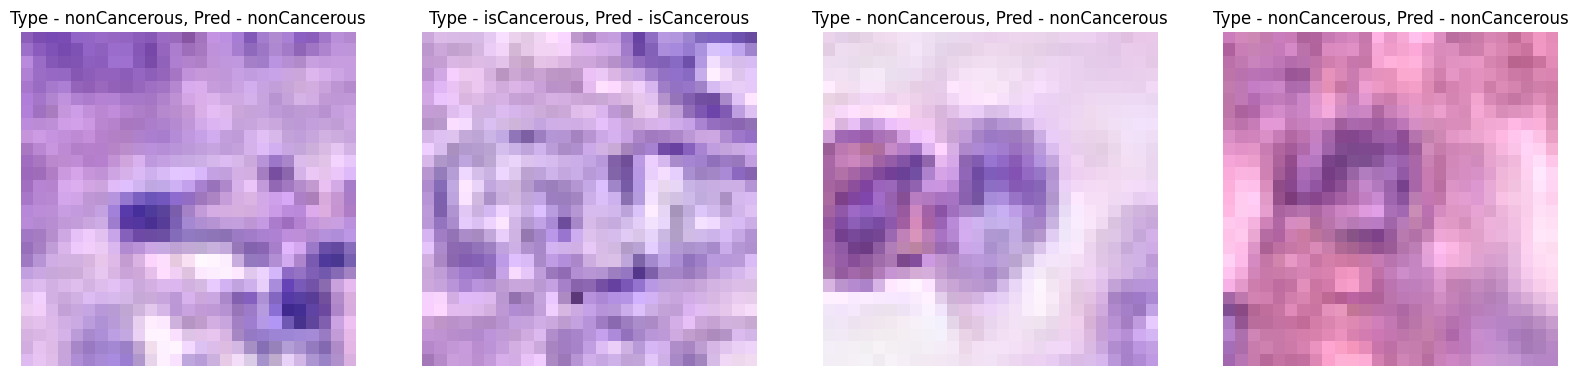

In [180]:
model.evaluate(test_generator)
label_names = {'nonCancerous' : 0, 'isCancerous' : 1}

d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(25, 30))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("Type - {}, Pred - {}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [181]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

 122/3798 [..............................] - ETA: 4s - loss: 0.3581 - categorical_accuracy: 0.8361

2023-05-15 10:41:14.927761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3798/3798 [==============================] - 4s 1ms/step - loss: 0.3257 - categorical_accuracy: 0.8586
Test Loss: 0.32566729187965393
Test Accuracy: 0.8586097955703735


# Baseline Deep Neural Network

In [ ]:
import tensorflow as tf


model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(108, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_1 = model_VGG_1.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)

In [ ]:
plot_learning_curve(history_VGG_1.history['loss'], history_VGG_1.history['val_loss'], 
                    history_VGG_1.history['categorical_accuracy'], history_VGG_1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [ ]:
#overfit

In [ ]:
reg_lambda = 0.001

model_VGG_2 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(108, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_2 = model_VGG_2.fit_generator(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

plot_learning_curve(history_VGG_2.history['loss'], history_VGG_2.history['val_loss'], 
                    history_VGG_2.history['categorical_accuracy'], history_VGG_2.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [ ]:
# Data Augment

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=trainingSetCellType,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=validationSetCellType,
        directory='./Image_classification_data/patch_images/',
        x_col="ImageName",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

In [ ]:

reg_lambda = 0.001

model_VGG_3 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same', 
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(108, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_3.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [ ]:
history_VGG_3 = model_VGG_3.fit_generator(train_generator, validation_data = validation_generator, epochs=100, verbose=0)

plot_learning_curve(history_VGG_3.history['loss'], history_VGG_3.history['val_loss'], 
                    history_VGG_3.history['categorical_accuracy'], history_VGG_3.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')